# Proyecto 1 analítica computacional

# Tarea 2 - Exploración de datos

#### Importar librerías

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Estadísticas descriptivas

In [25]:
df = pd.read_csv("datos_apartamentos_rent.csv",encoding="ISO-8859-1", delimiter=";")
# %%
# Seleccionar solo las columnas relevantes para análisis numérico
numerical_columns = ["bathrooms", "bedrooms", "price", "square_feet"]

# Estadísticas descriptivas
print("Estadísticas Descriptivas:")
print(df[numerical_columns].describe())

Estadísticas Descriptivas:
         bathrooms     bedrooms         price   square_feet
count  9966.000000  9993.000000  10000.000000  10000.000000
mean      1.380544     1.744021   1486.277500    945.810500
std       0.615410     0.942354   1076.507968    655.755736
min       1.000000     0.000000    200.000000    101.000000
25%       1.000000     1.000000    949.000000    649.000000
50%       1.000000     2.000000   1270.000000    802.000000
75%       2.000000     2.000000   1695.000000   1100.000000
max       8.500000     9.000000  52500.000000  40000.000000


#### Histograma de precios 

<Figure size 1000x600 with 0 Axes>

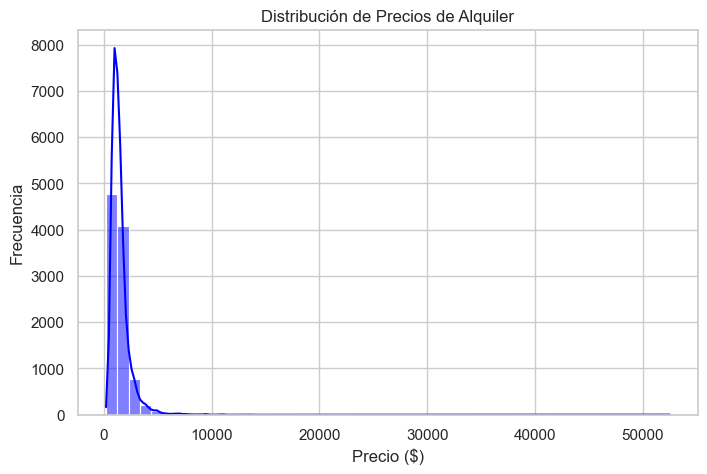

In [26]:
# Configuración general de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Histograma de precios
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True, color="blue")
plt.title("Distribución de Precios de Alquiler")
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.show()

#### Diagramas de caja

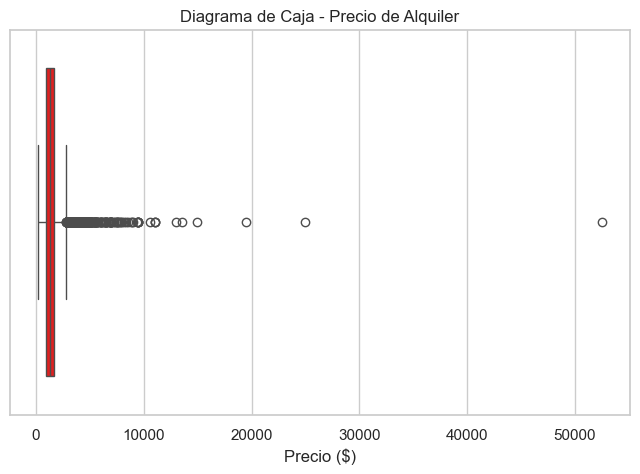

In [27]:
# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"], color="red")
plt.title("Diagrama de Caja - Precio de Alquiler")
plt.xlabel("Precio ($)")
plt.show()

#### Diagramas de dispersión

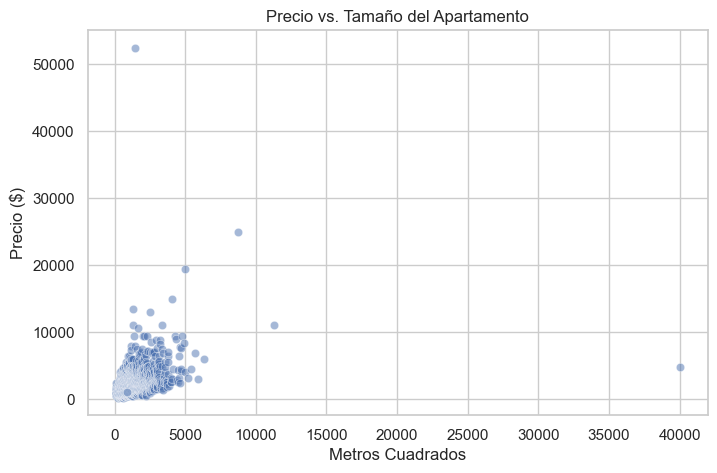

In [28]:
# Diagramas de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["square_feet"], y=df["price"], alpha=0.5)
plt.title("Precio vs. Tamaño del Apartamento")
plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio ($)")
plt.show()

#### Diagramas de violín

C:\Users\websa\AppData\Local\Temp\ipykernel_7768\3058705248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["bedrooms"], y=df["price"], palette="coolwarm")


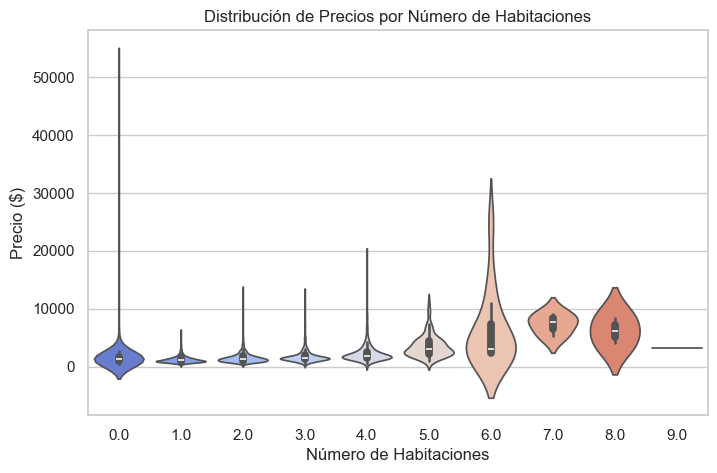

In [29]:
# Diagramas de violín por número de habitaciones
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["bedrooms"], y=df["price"], palette="coolwarm")
plt.title("Distribución de Precios por Número de Habitaciones")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Precio ($)")
plt.show()

#### Matriz de correlación

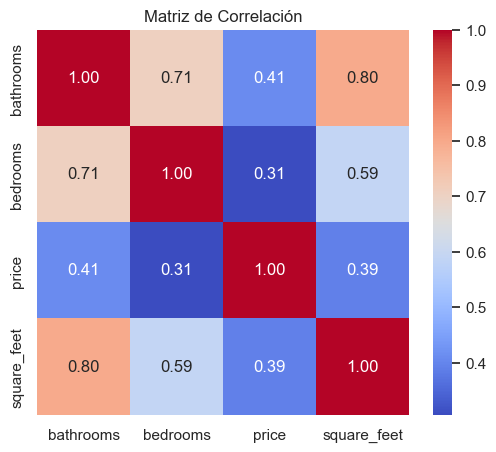

In [30]:
# Matriz de correlación
plt.figure(figsize=(6, 5))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

#### Gráficos de conteo para variables discretas

C:\Users\websa\AppData\Local\Temp\ipykernel_7768\4127574049.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="coolwarm", order=df[col].value_counts().index)


<Figure size 1200x800 with 0 Axes>

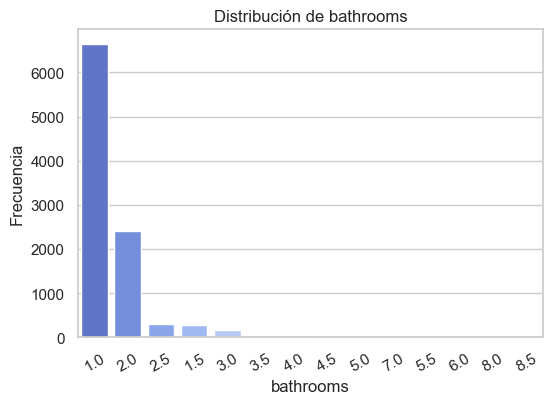

C:\Users\websa\AppData\Local\Temp\ipykernel_7768\4127574049.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="coolwarm", order=df[col].value_counts().index)


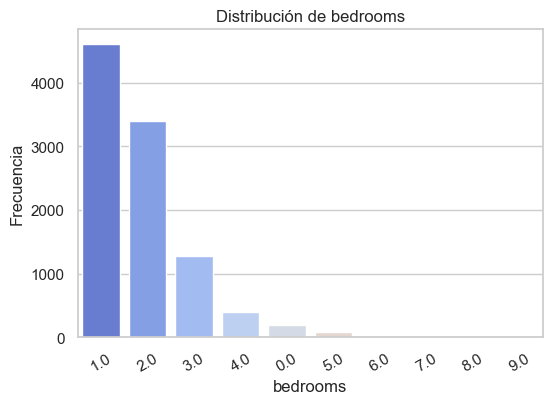

C:\Users\websa\AppData\Local\Temp\ipykernel_7768\4127574049.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="coolwarm", order=df[col].value_counts().index)


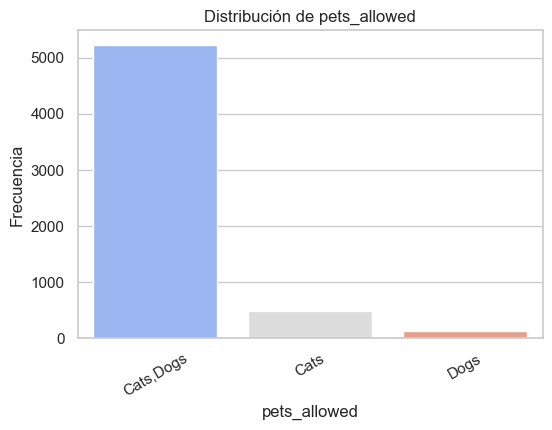

In [31]:
# Seleccionar variables discretas relevantes
discrete_columns = ["bathrooms", "bedrooms", "pets_allowed"]

# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Gráficos de conteo para variables discretas
for col in discrete_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="coolwarm", order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=30)  # Rotar etiquetas si es necesario
    plt.show()

# Tarea 3 - Preparación de los datos

In [32]:
# Calcular frecuencias para "bathrooms" y "bedrooms" (valores exactos)
freq_bathrooms = df["bathrooms"].value_counts().sort_index()
freq_bedrooms = df["bedrooms"].value_counts().sort_index()

# Definir rangos para "price" y "square_feet"
price_bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, 20000, 50000]
square_feet_bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, 20000, 40000]

# Calcular frecuencias por rangos
freq_price = pd.cut(df["price"], bins=price_bins).value_counts().sort_index()
freq_square_feet = pd.cut(df["square_feet"], bins=square_feet_bins).value_counts().sort_index()

#### Frecuencias de los datos (por rango)

In [33]:
# Mostrar las frecuencias
print("\nFrecuencia de Bathrooms:")
print(freq_bathrooms)


Frecuencia de Bathrooms:
bathrooms
1.0    6639
1.5     282
2.0    2418
2.5     315
3.0     174
3.5      66
4.0      46
4.5      12
5.0       8
5.5       1
6.0       1
7.0       2
8.0       1
8.5       1
Name: count, dtype: int64


In [34]:
print("\nFrecuencia de Bedrooms:")
print(freq_bedrooms)


Frecuencia de Bedrooms:
bedrooms
0.0     198
1.0    4607
2.0    3398
3.0    1276
4.0     404
5.0      89
6.0      15
7.0       3
8.0       2
9.0       1
Name: count, dtype: int64


In [35]:
print("\nFrecuencia de Price (por rangos):")
print(freq_price)


Frecuencia de Price (por rangos):
price
(0, 500]            77
(500, 1000]       2991
(1000, 1500]      3556
(1500, 2000]      1821
(2000, 3000]      1086
(3000, 5000]       383
(5000, 10000]       76
(10000, 20000]       8
(20000, 50000]       1
Name: count, dtype: int64


In [36]:
print("\nFrecuencia de Square Feet (por rangos):")
print(freq_square_feet)


Frecuencia de Square Feet (por rangos):
square_feet
(0, 500]          1005
(500, 1000]       5884
(1000, 1500]      2136
(1500, 2000]       564
(2000, 3000]       322
(3000, 5000]        81
(5000, 10000]        6
(10000, 20000]       1
(20000, 40000]       1
Name: count, dtype: int64


In [37]:
threshold = 0.5
# 50% de los datos deben ser no nulos
df_limpio = df.dropna(axis=1, thresh=int(threshold * len(df)))
# Contar cuántos ceros hay en cada columna
zero_counts = (df == 0).sum()

# Calcular el porcentaje de ceros por columna
zero_percentage = zero_counts / len(df)

# Filtrar las columnas que tienen menos del 50% de ceros
df_limpio = df.loc[:, zero_percentage < threshold]

df_limpio

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


#### Regla de Tukey

In [38]:
# Calcular Q1, Q3, IQR y los límites
iqr_data = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los datos dentro de los cuartiles (sin atípicos)
    filtered_values = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]

    # Guardar información
    iqr_data[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Límite Inferior": lower_bound,
        "Límite Superior": upper_bound,
        "Valores dentro del rango": filtered_values.describe()
    }

# Imprimir los resultados
for col, stats in iqr_data.items():
    print(f"\n=== {col} ===")
    for key, value in stats.items():
        print(f"{key}: {value}")


=== bathrooms ===
Q1: 1.0
Q3: 2.0
IQR: 1.0
Límite Inferior: -0.5
Límite Superior: 3.5
Valores dentro del rango: count    9894.000000
mean        1.358247
std         0.553966
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.500000
Name: bathrooms, dtype: float64

=== bedrooms ===
Q1: 1.0
Q3: 2.0
IQR: 1.0
Límite Inferior: -0.5
Límite Superior: 3.5
Valores dentro del rango: count    9479.000000
mean        1.606815
std         0.741385
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: bedrooms, dtype: float64

=== price ===
Q1: 949.0
Q3: 1695.0
IQR: 746.0
Límite Inferior: -170.0
Límite Superior: 2814.0
Valores dentro del rango: count    9382.000000
mean     1309.270944
std       499.777409
min       200.000000
25%       925.000000
50%      1229.500000
75%      1599.000000
max      2810.000000
Name: price, dtype: float64

=== square_feet ===
Q1: 649.0
Q3: 1100.0
IQR: 451.0
Límite

In [39]:
# Aplicar la Regla de Tukey para eliminar datos atípicos
def remove_outliers_tukey(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil
    Q3 = df[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartil
    
    # Definir límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar valores dentro del rango permitido
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar la eliminación de atípicos a todas las columnas numéricas
for col in numerical_columns:
    df = remove_outliers_tukey(df, col)

# Eliminar registros duplicados
df = df.drop_duplicates()

#Guardar el dataset limpio
#df.to_csv("datos_apartamentos_rent_limpio.csv", index=False)
# Esta línea es si se quiere guardar en otro archivo


df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
5,5667891676,housing/rent/apartment,0 BR in New York NY 10019,**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,USD,No,Thumbnail,...,"$2,475",Monthly,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784
8,5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,"$1,495",Monthly,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313
14,5664571820,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,"$1,695",Monthly,190,57 Taylor St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,5668629192,housing/rent/apartment,Three BR 3308 Rainbow Creek Cir,This unit is located at 3308 Rainbow Creek Cir...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$2,000",Monthly,1574,3308 Rainbow Creek Circle,Thousand Oaks,CA,34.2009,-118.8636,RentLingo,1577359599
9136,5668624391,housing/rent/apartment,Three BR 1604 Dusty Rose Lane,"This unit is located at 1604 Dusty Rose Lane, ...","Dishwasher,Garbage Disposal,Refrigerator",2.0,3.0,USD,No,Thumbnail,...,"$1,549",Monthly,1574,1604 Dusty Rose Ln,Brandon,FL,27.9275,-82.2984,RentLingo,1577359236
9139,5664596429,housing/rent/apartment,Two BR 4694 Club House Drive,"This unit is located at 4694 Clubhouse Drive, ...",Clubhouse,2.5,2.0,USD,No,Thumbnail,...,"$1,700",Monthly,1575,4694 Club House Dr,Lake Orion,MI,42.7624,-83.2742,RentLingo,1577016984
9140,5664576263,housing/rent/apartment,Three BR 169 Forsyth Pkwy,"This unit is located at 169 Forsyth Pkwy, Clay...",NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,425",Monthly,1575,169 Forsyth Parkway,Clayton,NC,35.6101,-78.4715,RentLingo,1577015454


# Tarea 4 - Modelamiento

In [40]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [41]:
# Eliminar varias columnas
#df_modelamiento quita las variables que tiene sentido sacar por las características de estas (reducido)
df_modelamiento = df.drop(columns=["fee","cityname","currency", "price_display", "amenities", "title", "body", "address","source","id", "time","has_photo"])
df_modelamiento
#df_modelamiento2 quita solo algunas variables menos que df_modelamiento ("completo")
df_modelamiento2 = df.drop(columns=["fee","currency", "price_display", "amenities", "title", "body", "address","source","id"])


In [ ]:
from sklearn.model_selection import train_test_split
# Definir variable objetivo (Y) y variables predictoras (X)
X = df_modelamiento.drop(columns=["price"]) 
y = df_modelamiento["price"]


# Convertir variables categóricas con One-Hot Encoding
X = pd.get_dummies(X, columns=["state", "price_type", "pets_allowed", "category"], drop_first=True)
X=X.fillna(0)

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#  Hacer predicciones
y_pred = modelo.predict(X_test)
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print("\n **Modelo 1 (Menos Variables)**")
print(f'MSE: {mse}')
print(f"RMSE: {rmse}")
print(f" R²: {r2}")


# Ver coeficientes del modelo
coef_df = pd.DataFrame({"Variable": X.columns, "Coeficiente": modelo.coef_})
coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)
#print(coef_df)

#  **MODELO 2 (Más Variables)**----------------------------------------------------------------------
X2 = df_modelamiento2.drop(columns=["price"])
# 🔹 Convertir más variables categóricas con One-Hot Encoding
X2 = pd.get_dummies(X2, columns=["state", "price_type", "pets_allowed", "category", "cityname", "has_photo"], drop_first=True)
X2 = X2.fillna(0)

# 🔹 Dividir en conjunto de entrenamiento y prueba
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# 🔹 Entrenar el modelo con más variables
modelo2 = LinearRegression()
modelo2.fit(X2_train, y_train)

# 🔹 Hacer predicciones
y_pred2 = modelo2.predict(X2_test)

# Evaluación del modelo
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = mse2 ** 0.5
r2_2 = r2_score(y_test, y_pred2)
print("\n **Modelo 2 (Más Variables)**")
print(f'MSE: {mse2}')
print(f"RMSE: {rmse2}")
print(f" R²: {r2_2}")

# Ver coeficientes del modelo 2
coef_df2 = pd.DataFrame({"Variable": X2.columns, "Coeficiente": modelo2.coef_})
coef_df2 = coef_df2.sort_values(by="Coeficiente", ascending=False)



 **Modelo 1 (Menos Variables)**
MSE: 106403.5735705116
RMSE: 326.19560630166615
 R²: 0.5097418942059315

 **Modelo 2 (Más Variables)**
MSE: 113168.11661724639
RMSE: 336.4046917289448
 R²: 0.4785740306711891


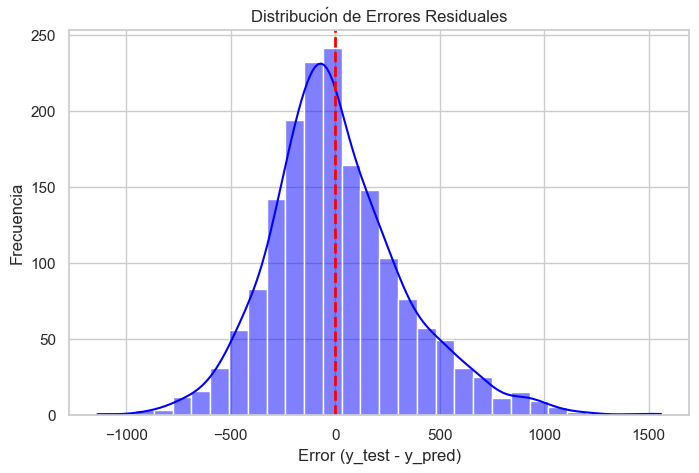

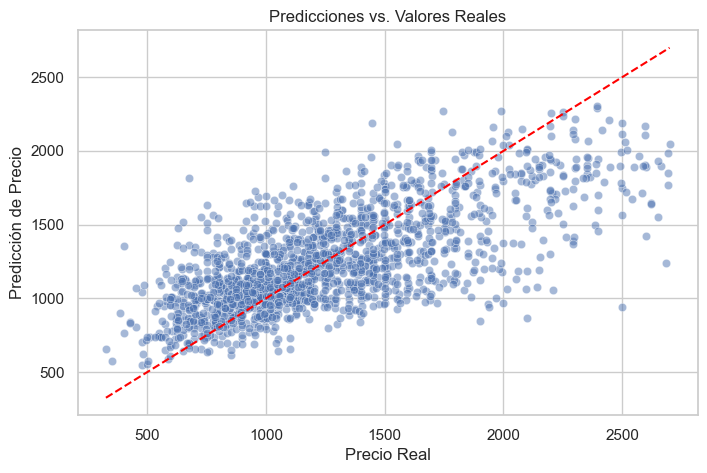

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=30, kde=True, color="blue")
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title("Distribución de Errores Residuales")
plt.xlabel("Error (y_test - y_pred)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Precio Real")
plt.ylabel("Predicción de Precio")
plt.title("Predicciones vs. Valores Reales")
plt.show()